# PyPSA simple example

Play around with the Hawaii40 case. This start from the cleaned up case created from another script

In [146]:
import pandas as pd
import  io
import pypsa

In [190]:
# Linear powerflow .lpf() is an approximation of full powerflow. It may make be useful if have convergence issues
USE_LPF = False

In [191]:
def check_pf(info):
    converged = info.converged.any().any()
    max_error = info.error.max().max()
    print(f"Sim converged: {converged}")
    print(f"Max error: {max_error:.2e}")

    if ~converged:
        raise Exception("Sim didn't convert - results are garbage. Change to lpf()")

In [192]:
import pypsa
network = pypsa.Network()
network.import_from_csv_folder('csv')
if USE_LPF:
    network.lpf() 
else:
    info = network.pf() # Full powerflow
    check_pf(info)

INFO:pypsa.network.io:Imported network 'Unnamed Network' has buses, generators, lines, loads, shunt_impedances, transformers
INFO:pypsa.network.power_flow:Performing non-linear load-flow on AC sub-network <pypsa.networks.SubNetwork object at 0x000001ED0E431160> for snapshots Index(['now'], dtype='object', name='snapshot')


Sim converged: True
Max error: 1.21e-07


In [193]:
network = pypsa.Network()
network.import_from_csv_folder('csv')
if USE_LPF:
    network.lpf() 
else:
    info = network.pf() # Full powerflow
    check_pf(info)

INFO:pypsa.network.io:Imported network 'Unnamed Network' has buses, generators, lines, loads, shunt_impedances, transformers
INFO:pypsa.network.power_flow:Performing non-linear load-flow on AC sub-network <pypsa.networks.SubNetwork object at 0x000001ED0DDE36E0> for snapshots Index(['now'], dtype='object', name='snapshot')


Sim converged: True
Max error: 1.21e-07


{'nodes': {'Bus': <matplotlib.collections.PatchCollection at 0x1ed0e58f6b0>},
 'branches': {'Line': <matplotlib.collections.LineCollection at 0x1ed0e58c290>,
  'Transformer': <matplotlib.collections.LineCollection at 0x1ed0e53d940>},
 'flows': {}}

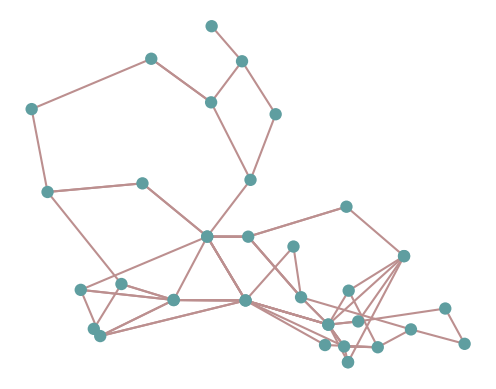

In [194]:
network.plot.map(bus_sizes=5e-5,)

In [195]:
# Branches = lines + transformers
# br = network.branches().loc['Line']
lines = network.lines
lines.columns

Index(['bus0', 'bus1', 'type', 'x', 'r', 'g', 'b', 's_nom', 's_nom_mod',
       's_nom_extendable', 's_nom_min', 's_nom_max', 's_nom_set', 's_max_pu',
       'capital_cost', 'active', 'build_year', 'lifetime', 'length', 'carrier',
       'terrain_factor', 'num_parallel', 'v_ang_min', 'v_ang_max',
       'sub_network', 'x_pu', 'r_pu', 'g_pu', 'b_pu', 'x_pu_eff', 'r_pu_eff',
       's_nom_opt', 'ckt', 'branch_name', 'bus0_name', 'bus1_name',
       'conductor', 'MOT', 'status', 'original_index', 'v_nom'],
      dtype='object')

In [196]:
# lines = lines.reset_index()
# Sometimes it's easier to index by busses to get the data.
# lines = lines.set_index(['bus0', 'bus1'])

In [197]:
lines.head()

,bus0,bus1,type,x,r,g,b,s_nom,s_nom_mod,s_nom_extendable,...,s_nom_opt,ckt,branch_name,bus0_name,bus1_name,conductor,MOT,status,original_index,v_nom
name,,,,,,,,,,,,,,,,,,,,,
L0,1,5,,3.982672,0.647496,0.0,0.000044,228.0,0.0,False,...,0.0,1,ALOHA138 (1) TO HONOLULU138 (5) CKT 1,ALOHA138,HONOLULU138,795 ACSR 26/7 DRAKE,80,1.0,3,138.0
L1,1,5,,3.982672,0.647496,0.0,0.000044,228.0,0.0,False,...,0.0,2,ALOHA138 (1) TO HONOLULU138 (5) CKT 2,ALOHA138,HONOLULU138,795 ACSR 26/7 DRAKE,80,1.0,4,138.0
L2,1,22,,4.603506,0.712246,0.0,0.000032,172.0,0.0,False,...,0.0,1,ALOHA138 (1) TO WAIPAHU138 (22) CKT 1,ALOHA138,WAIPAHU138,556.5 ACSR 26/7 DOVE,75,1.0,5,138.0
L3,1,25,,3.008571,0.550372,0.0,0.000040,215.0,0.0,False,...,0.0,1,ALOHA138 (1) TO EWA BEACH138 (25) CKT 1,ALOHA138,EWA BEACH138,795 ACSR 26/7 DRAKE,85,1.0,6,138.0
L4,1,25,,3.008571,0.550372,0.0,0.000040,215.0,0.0,False,...,0.0,2,ALOHA138 (1) TO EWA BEACH138 (25) CKT 2,ALOHA138,EWA BEACH138,795 ACSR 26/7 DRAKE,85,1.0,7,138.0


In [105]:
# All details for L556 | 22 - 37 | WAIPAHU138 - KAHE138
lines.loc['L56']

bus0                                                     22
bus1                                                     37
type                                                       
x                                                   7.77776
r                                                  1.298801
g                                                       0.0
b                                                  0.000058
s_nom                                                 295.0
s_nom_mod                                               0.0
s_nom_extendable                                      False
s_nom_min                                               0.0
s_nom_max                                               inf
s_nom_set                                               NaN
s_max_pu                                                1.0
capital_cost                                            0.0
active                                                 True
build_year                              

In [106]:
# But for now we care deeplly about the rating
# rateA <-> s_nom
# rateB, rateC are typically emergency ratings. Right now we just care about one rating - s_nom 
lines.loc['L56']['s_nom']

np.float64(295.0)

In [145]:
# Get all the ratings
lines[['s_nom']].head()

,s_nom
name,
L0,228.0
L1,228.0
L2,172.0
L3,215.0
L4,215.0


In [108]:
# When we solve the case, the results are stored in the line_t dataframe. 
# real power MW for each line at p0=bus0. The flow is the same at p1=bus1 
network.lines_t['p0']

name,L0,L1,L2,L3,L4,L5,L6,L7,L8,L9,...,L67,L68,L69,L70,L71,L72,L73,L74,L75,L76
snapshot,,,,,,,,,,,,,,,,,,,,,
now,79.168558,79.168558,-22.449716,-66.694086,-66.694086,-61.553733,-61.553733,37.115632,45.596813,45.596813,...,53.65,36.556723,36.556723,33.366553,12.794867,32.418296,23.08446,-18.661974,-18.661974,24.980921


In [109]:
# Get the flow on one line. p0 is the active power at bus0
# Note that the solved powerflow is much lower than the max capability of the line
network.lines_t['p0'][['L56']]

name,L56
snapshot,
now,-46.323237


In [110]:
# We don't care about voltage magnitude especially with a linear power flow where everything is 1.0
# But if we want to get bus voltages you would use this command
network.buses_t['v_mag_pu']

name,1,2,3,4,5,6,7,8,9,10,...,28,29,30,31,32,33,34,35,36,37
snapshot,,,,,,,,,,,,,,,,,,,,,
now,0.995303,1.0,0.987812,0.985289,0.991353,0.986419,0.9859,0.981088,0.989437,0.986062,...,1.0,0.993706,0.995275,0.998003,0.990158,1.0,1.0,1.0,1.0,1.0


In [111]:
# Get the flow on one line. q0 is the imaginary power at bus0
# Q is not available for lpf() - it's only available for the pf() solution
if not USE_LPF:
    q = network.lines_t['q0'].loc['now']['L56']
    print('foo')
    print(f"L56 Q: {q:.4f}")

foo
L56 Q: 0.9975


## Check all ratings

Typically we want to check the flows against all ratings to see if anything is overloaded. 
The only tricky part here is massaging the data.

In [112]:
# pivot to tall dataframe
# This will be series instead of a dataframe
p0_now = network.lines_t['p0'].loc['now']
p0_now.name = 'p0_now' # rename series 
p0_now

name
L0     79.168558
L1     79.168558
L2    -22.449716
L3    -66.694086
L4    -66.694086
         ...    
L72    32.418296
L73    23.084460
L74   -18.661974
L75   -18.661974
L76    24.980921
Name: p0_now, Length: 77, dtype: float64

In [113]:
# Change to dataframe to make merge/join easier. There's probably a better way to do this, but I don't care
p0_df = pd.DataFrame(p0_now)
p0_df.head()

,p0_now
name,
L0,79.168558
L1,79.168558
L2,-22.449716
L3,-66.694086
L4,-66.694086


In [114]:
# use abs() because direction doesn't matter
# Ratings are typically rounded to nearest int
# p0_df = p0_df['p0_now'].map(abs).round(0)
p0_df = p0_df['p0_now'].map(abs)
p0_df.head()

name
L0    79.168558
L1    79.168558
L2    22.449716
L3    66.694086
L4    66.694086
Name: p0_now, dtype: float64

In [115]:
# Grab the nominal ratings from the network data
s_nom = network.lines[['s_nom']]
s_nom.head()

,s_nom
name,
L0,228.0
L1,228.0
L2,172.0
L3,215.0
L4,215.0


In [116]:
# JOIN the nominal and solved rating using the LineName
df = pd.merge(s_nom, p0_df, how='inner', left_index=True, right_index=True)
df.head()

,s_nom,p0_now
name,,
L0,228.0,79.168558
L1,228.0,79.168558
L2,172.0,22.449716
L3,215.0,66.694086
L4,215.0,66.694086


In [117]:
# Calculate percent loading for the line
df['loading_frac'] = (1 - (df['s_nom'] - df['p0_now']) / df['s_nom']).round(2)
df.head()

,s_nom,p0_now,loading_frac
name,,,
L0,228.0,79.168558,0.35
L1,228.0,79.168558,0.35
L2,172.0,22.449716,0.13
L3,215.0,66.694086,0.31
L4,215.0,66.694086,0.31


In [118]:
df.sort_values(by='loading_frac', ascending=False)

,s_nom,p0_now,loading_frac
name,,,
L49,96.0,77.532753,0.81
L48,96.0,77.532753,0.81
L51,96.0,77.532753,0.81
L50,96.0,77.532753,0.81
L67,70.0,53.650000,0.77
...,...,...,...
L60,70.0,4.291165,0.06
L59,70.0,4.291165,0.06
L52,86.0,3.404518,0.04
